# Polynomial Regression and Regularization Example

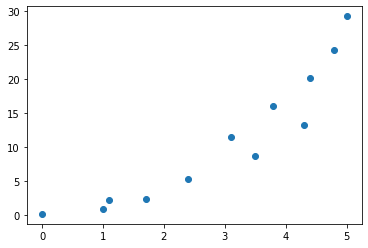

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = [[0.0], [1.0], [1.1], [1.7], [2.4], [3.1], [3.5], [3.8], [4.3], [4.4], [4.8], [5.0]]
y = [0.2, 0.9, 2.3, 2.4, 5.3, 11.5, 8.7, 16.0, 13.2, 20.1, 24.3, 29.2]
X = np.asarray(x)
Y = np.asarray(y)
plt.scatter(X,Y)

## Underfitting:

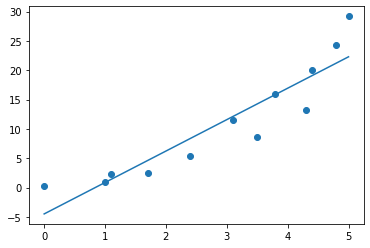

In [2]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X,Y)
Xtemp = []
for i in range(0,100):
    Xtemp.append(5.0*(i/99))
Xplot = np.asarray(Xtemp)
plt.scatter(X,Y)
plt.plot(Xplot, Xplot*linreg.coef_ + linreg.intercept_)

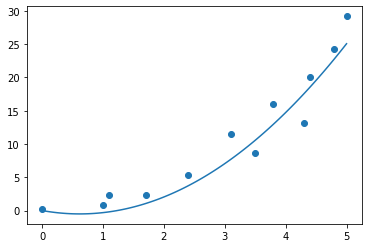

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly2 = PolynomialFeatures(degree=2)
poly2f = poly2.fit_transform(X)
reg2 = LinearRegression().fit(poly2f,Y)
plt.scatter(X,Y)
plt.plot(Xplot, reg2.coef_[0] + Xplot*reg2.coef_[1] + Xplot**2*reg2.coef_[2])

## Overfitting:

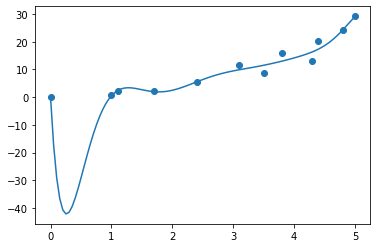

In [4]:
d = 9
poly = PolynomialFeatures(degree=d)
polyf = poly.fit_transform(X)
reg = LinearRegression().fit(polyf,Y)
plt.scatter(X,Y)
Yplot = np.full(100, reg.coef_[0])
for i in range(1,d+1):
    Yplot = Yplot+Xplot**i*reg.coef_[i]
plt.plot(Xplot, Yplot)

## Ridge Regularization:

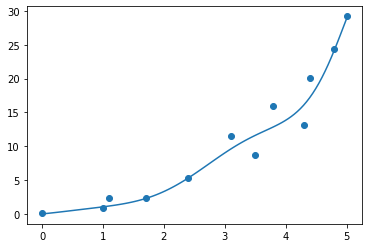

In [9]:
from sklearn import linear_model
ridge=linear_model.Ridge(alpha = 0.1)
ridge.fit(polyf, Y)
Yplot = np.full(100, ridge.coef_[0])
for i in range(1,d+1):
    Yplot = Yplot+Xplot**i*ridge.coef_[i]
plt.scatter(X,Y)
plt.plot(Xplot, Yplot)